In [4]:
import numpy as np
from matplotlib import pyplot as plt

import baseline
import glob
import os
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
path = '/Users/daphne/Dropbox (MIT)/pd-mlhc/CIS'

data = baseline.prepare_data(path)

subject_ids, measurement_ids, all_data, all_n_data, on_off_labels, dyskinesia_labels, tremor_labels = data

X_tre, y_tre = baseline.cleaned_data(all_data, tremor_labels)
X_med, y_med = baseline.cleaned_data(all_data, on_off_labels)
X_dys, y_dys = baseline.cleaned_data(all_data, dyskinesia_labels)

In [7]:
demo_file = glob.glob(os.path.join(path, 'clinical_data/CIS-PD_Demographics.csv'))[0]
demo = pd.read_csv(demo_file)

In [12]:
demo_trim = demo[demo['subject_id'].isin(subject_ids)]

In [34]:
'{:.1%} of the subjects are male ({} subjects)'.format(sum(list(demo_trim['Gender'] == 'Male'))/len(demo_trim), sum(list(demo_trim['Gender'] == 'Male')))

'68.8% of the subjects are male (11 subjects)'

In [40]:
num_meas = [len(j) for j in all_data]

In [57]:
len(all_data[0])

82

Text(0.5, 1.0, 'Number of Recordings per Patient')

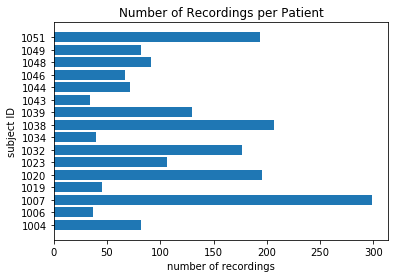

In [48]:
plt.figure()
plt.barh(np.linspace(1,16,16),num_meas, tick_label=subject_ids)
plt.xlabel('number of recordings')
plt.ylabel('subject ID')
plt.title('Number of Recordings per Patient')

In [73]:
# now, duration of recordings per patient
durs = []
for i in range(len(subject_ids)) :
    single = all_data[i]
    dur_single = [a.shape[0]*.02/60 for a in single]
    durs.append(sum(dur_single))

Text(0.5, 1.0, 'Duration of Recordings per Patient')

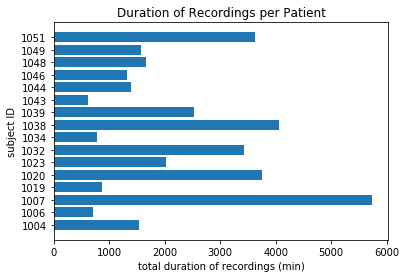

In [74]:
plt.figure()
plt.barh(np.linspace(1,16,16), durs, tick_label=subject_ids)
plt.xlabel('total duration of recordings (min)')
plt.ylabel('subject ID')
plt.title('Duration of Recordings per Patient')

In [75]:
updrs_file = glob.glob(os.path.join(path, 'clinical_data/CIS-PD_UPDRS_Part1_2_4.csv'))[0]
updrs1 = pd.read_csv(updrs_file)
updrs_file = glob.glob(os.path.join(path, 'clinical_data/CIS-PD_UPDRS_Part3.csv'))[0]
updrs2 = pd.read_csv(updrs_file)

In [79]:
updrs1

,subject_id,Visit,UPDRS_PartI_Total,UPDRS_PartII_Total,UPDRS_4.1,UPDRS_4.2,UPDRS_4.3,UPDRS_4.4,UPDRS_4.5,UPDRS_4.6
0,1000,Baseline,4,5,0,0,1,3,1,1
1,1004,Baseline,13,6,1,3,1,4,3,0
2,1006,Baseline,10,19,0,0,1,0,2,0
3,1007,Baseline,18,9,0,0,2,3,1,2
4,1016,Baseline,15,2,0,0,0,0,0,0
5,1018,Baseline,6,2,0,0,0,0,0,0
6,1019,Baseline,13,10,0,0,0,0,0,0
7,1020,Baseline,9,6,0,0,0,0,0,0
8,1023,Baseline,10,10,1,0,1,1,1,0
9,1030,Baseline,6,9,0,0,0,0,0,0
